<a href="https://colab.research.google.com/github/as4401s/AI-for-medicine/blob/master/exercise_double_descend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/muecke-math/Leibniz-Summer-School-2021

fatal: destination path 'Leibniz-Summer-School-2021' already exists and is not an empty directory.


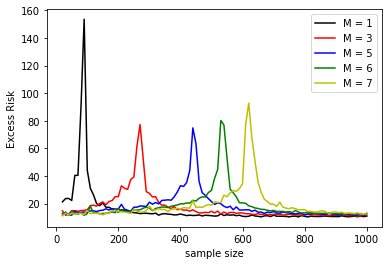

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 21 14:30:48 2021
@author: Nicole
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 13 20:30:49 2021
@author: bayerc
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import math

#from tqdm.auto import tqdm

data_train = np.loadtxt("Leibniz-Summer-School-2021/YearPredictionMSD-train-py.txt")
data_test = np.loadtxt("Leibniz-Summer-School-2021/YearPredictionMSD-test-py.txt")
Y_train = np.loadtxt("Leibniz-Summer-School-2021/YearPredictionMSD-label-train-py.txt")
Y_test = np.loadtxt("Leibniz-Summer-School-2021/YearPredictionMSD-label-test-py.txt")

n_train_total, d = data_train.shape
n_test_total, _ = data_test.shape

def l2_norm(x):
    """Define L^2-norm."""
    return np.sqrt(np.mean(x**2))

## Note that python is 0-based, hence the end value is one past the actual last value
N = np.arange(20, 1001, 10)

M = np.array([1,3,5,6,7])

Error = np.zeros((len(N), len(M)))

## nb of repetitions of the experiment 
## you can smoothen the curve by increasing K 

K = 10

##### begin loops 

for _ in range(K):
    for j in range(len(N)):
        n = N[j]
        
        ind = np.random.choice(n_train_total, n, replace = False)
        
        X = data_train[ind,:].transpose()
        Y = Y_train[ind]
        
        for a in range(len(M)):
            m=M[a] 
                        
            #beta_loc = np.zeros(d)
            
            beta_loc = np.zeros(d) 
            
            for mm in range(m):
                ind_machines = np.random.choice(n, math.floor(n/m), replace = False)
              
                XX = X[:,ind_machines]
                YY = Y[ind_machines]
                    
                beta_loc = beta_loc + np.linalg.pinv(XX @ XX.transpose()) @ XX @ YY
            
                            
            beta_ave = beta_loc / m
            
            
            ## test error 

            n_test = int(n/3)

            #ind2 = np.arange(n_test)  
            ind2 = np.random.choice(n_test_total, n_test, replace = False)

            X_test = data_test[ind2,:]
            Y2 = Y_test[ind2]

            Error[j,a] = Error[j,a] + l2_norm(X_test @ beta_ave - Y2)


####### end loops 
## averaging 
            
Error = Error / K


### plot 


plt.plot(N, Error[:,0], "k-", label=f"M = {M[0]}")
plt.plot(N, Error[:,1], "r-", label=f"M = {M[1]}")
plt.plot(N, Error[:,2], "b-", label=f"M = {M[2]}")
plt.plot(N, Error[:,3], "g-", label=f"M = {M[3]}")
plt.plot(N, Error[:,4], "y-", label=f"M = {M[4]}")

plt.xlabel("sample size")
plt.ylabel("Excess Risk")
plt.legend(loc="upper right")
plt.show()

